In [16]:
from sklearn.datasets import load_iris, load_wine
import pandas as pd

iris = load_iris()
X_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y_iris = iris.target
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
y_wine = wine.target

In [17]:
X_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


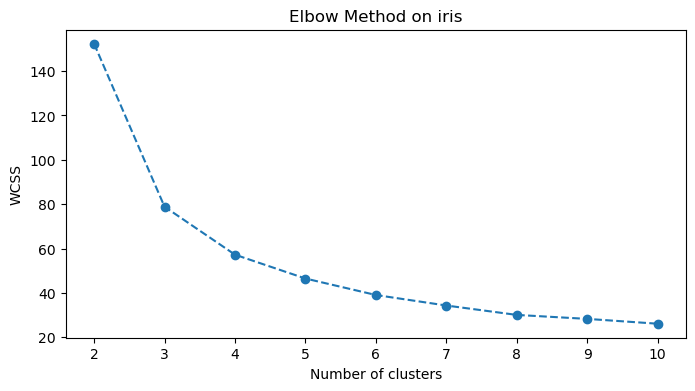

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn

wcss = []  # Within-Cluster-Sum-of-Squares
max_clusters = 10
calinski_harabasz_iris = []

def kmeans_labels(X, n_clusters):
    if n_clusters == 1:
        return np.repeat(a=0, repeats=len(X))
    else:
        return KMeans(n_clusters=n_clusters).fit(X).labels_

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',algorithm='auto',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)
    labels = kmeans_labels(X_iris, n_clusters=i)
    calinski_harabasz_iris.append(sklearn.metrics.calinski_harabasz_score(X_iris, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method on iris')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



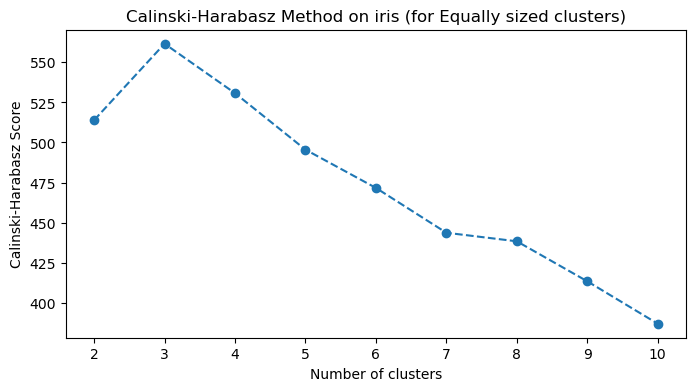

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), calinski_harabasz_iris, marker='o', linestyle='--')
plt.title('Calinski-Harabasz Method on iris (for Equally sized clusters)')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

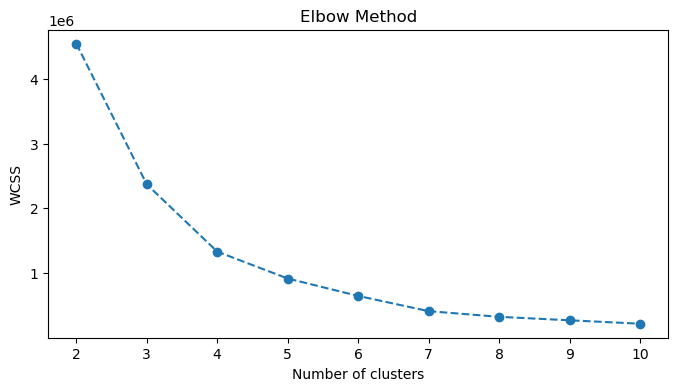

In [48]:
import math
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

max_clusters = 10

wcss = []
# bic_score_wine=[]

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',algorithm='auto',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_wine)
    wcss.append(kmeans.inertia_)
    # labels = kmeans_labels(X_wine, n_clusters=i)
    # bic_score_wine.append(sklearn.metrics.calinski_harabasz_score(X_wine, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
